# Introduction

Le domaine de l'immobilier a toujours été un sujet d'intérêt pour plusieurs raisons, que ce soit pour l'achat d'une maison, l'investissement immobilier ou même pour la recherche académique. Un des aspects les plus intrigants de l'immobilier est la détermination des prix des propriétés. Alors, comment pouvons-nous prédire les prix des maisons avec précision ?

Ce notebook explore l'utilisation des techniques d'apprentissage automatique pour prédire les prix des maisons. Nous allons travailler sur le jeu de données de prix des maisons fourni par Kaggle, une plateforme bien connue pour les compétitions en science des données et apprentissage automatique. Ce jeu de données contient diverses caractéristiques des maisons, comme le nombre de chambres, la superficie, l'emplacement, etc., ainsi que leurs prix de vente respectifs.

Notre objectif ici est de développer un modèle d'apprentissage automatique qui utilise ces caractéristiques pour prédire les prix des maisons. Pour cela, nous passerons par plusieurs étapes, notamment le prétraitement des données, l'exploration des données (EDA), la sélection des caractéristiques, la construction et l'entraînement du modèle, et enfin l'évaluation de ses performances.

Ce travail présente non seulement une importance académique en contribuant à la compréhension de l'application des méthodes d'apprentissage automatique à des problèmes concrets, mais il a également une grande valeur pratique. Un modèle précis de prédiction des prix des maisons peut aider les acheteurs, les vendeurs, les investisseurs et même les agents immobiliers à prendre des décisions plus éclairées.

Accompagnez-moi dans ce voyage d'apprentissage de l'application des techniques d'apprentissage automatique à la prédiction des prix de l'immobilier. Dans les sections suivantes, nous allons nous immerger dans les données, les analyser, construire notre modèle et l'évaluer. Votre feedback et vos suggestions sont toujours les bienvenus pour améliorer ce travail. Alors, allons-y et commençons notre exploration!

Ce bloc de code couvre plusieurs étapes importantes du processus de prétraitement des données et d'analyse exploratoire des données (EDA). Voici une description détaillée de ce que fait chaque partie du code:

1. **Importation des bibliothèques nécessaires :** Les bibliothèques comme pandas, numpy, seaborn, matplotlib, UMAP, lightgbm, sklearn et autres sont importées. Ces bibliothèques fournissent les outils nécessaires pour manipuler les données, visualiser les données, appliquer des algorithmes de réduction de dimensionnalité et construire le modèle de régression.

2. **Chargement des données :** Les fichiers CSV contenant les ensembles de données d'entraînement et de test sont chargés dans des dataframes pandas.

3. **Visualisation des informations sur l'ensemble de données de test :** La méthode `info()` est utilisée pour obtenir un aperçu des données de test, montrant le nombre d'entrées, le type de données pour chaque colonne, et si elles contiennent des valeurs manquantes.

4. **Concaténation des données :** Les ensembles de données d'entraînement et de test sont concaténés pour faciliter le prétraitement des données. L'index est réinitialisé à 'Id', ce qui fait de 'Id' l'identifiant unique pour chaque maison.

5. **Transformation des caractéristiques catégoriques :** Pour chaque colonne de l'ensemble de données d'entraînement qui a un type de données 'objet' (qui est généralement utilisé pour les caractéristiques catégoriques), le code utilise la fonction `factorize()` pour transformer ces caractéristiques en numérique. Ceci est nécessaire car la plupart des algorithmes de machine learning ne peuvent pas traiter directement les caractéristiques catégoriques.

6. **Séparation des ensembles de données :** Les ensembles de données d'entraînement et de test sont à nouveau séparés après le prétraitement, en utilisant l'indice sauvegardé précédemment.

7. **Visualisation des corrélations :** Enfin, une carte de chaleur des corrélations Spearman entre les caractéristiques de l'ensemble de données d'entraînement est créée à l'aide de seaborn. Les corrélations peuvent donner un aperçu de la relation entre les différentes caractéristiques et le prix de vente, ce qui peut être utile pour la sélection des caractéristiques.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from umap import UMAP
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
data_train = data_train.dropna(axis=1, thresh=len(data_train)*0.6)
data_test = data_test[data_train.drop(['SalePrice'], axis=1).columns]

In [5]:
for column in [c for c in data_train.columns if data_train[c].isna().any()]:
    print(data_train[column].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 

In [6]:
nan_cols = [c for c in data_train.columns if data_train[c].isna().any()]
for col, types in zip(data_train[nan_cols], data_train[nan_cols].dtypes):
    print(col)
    if types == 'int64' or types == 'float64':
        data_train[col] = data_train[col].fillna(value=data_train[col].median())
    else:
        data_train[col] = data_train[col].fillna(value='None')
        
nan_cols = [c for c in data_test.columns if data_test[c].isna().any()]
for col, types in zip(data_test[nan_cols], data_test[nan_cols].dtypes):
    print(col)
    if types == 'int64' or types == 'float64':
        data_test[col] = data_test[col].fillna(value=data_test[col].median())
    else:
        data_test[col] = data_test[col].fillna(value='None')

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
MSZoning
LotFrontage
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
SaleType


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [8]:
indice_join = data_test.iloc[0].Id - 1
data_join = pd.concat([data_train, data_test], axis=0)
data_join = data_join.set_index(['Id'])
for col, types in zip(data_train, data_train.dtypes):
    if types == 'object':
        data_join[col] = pd.factorize(data_join[col])[0]

data_test = data_join.iloc[indice_join:].drop(['SalePrice'], axis=1)
data_train = data_join.iloc[:-indice_join]
data_train, data_test = data_train.reset_index(), data_test.reset_index()

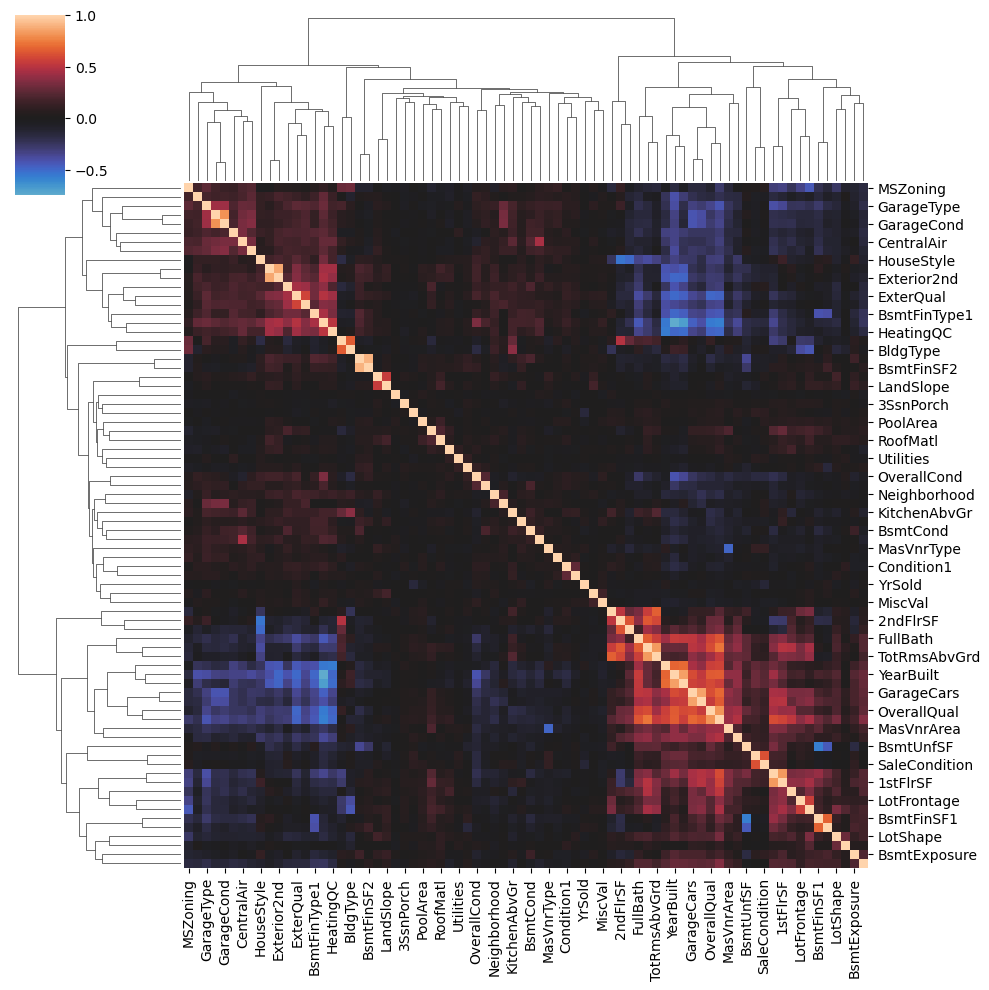

In [9]:
sns.clustermap(data_train.corr(method='spearman'), annot=False, center=0)

Ce bloc de code s'occupe de la sélection des caractéristiques, une étape essentielle dans le processus de préparation des données pour l'apprentissage automatique.

1. **Calcul des corrélations :** La première ligne de code calcule la corrélation entre chaque caractéristique (colonne) dans `data_train` et la colonne `SalePrice`. La corrélation est une mesure de la relation linéaire entre deux variables. Les valeurs sont absolues (toutes positives) pour ne considérer que la force de la relation, et non sa direction. Ces corrélations sont ensuite triées.

2. **Sélection des caractéristiques :** Ensuite, toutes les caractéristiques ayant une corrélation supérieure à 0.05 avec `SalePrice` sont sélectionnées pour être utilisées dans le modèle. Cette étape est appelée sélection des caractéristiques, et elle est importante pour éliminer le bruit et améliorer l'efficacité du modèle.

3. **Mise à jour des ensembles de données :** Enfin, les ensembles de données `data_train` et `data_test` sont mis à jour pour ne contenir que les caractéristiques sélectionnées, plus la colonne `SalePrice` pour `data_train`.

Ce processus de sélection des caractéristiques basé sur la corrélation peut être très efficace pour réduire le nombre de caractéristiques à un sous-ensemble plus gérable et potentiellement plus significatif. Cependant, il est important de noter que cela ne prend en compte que les relations linéaires entre les caractéristiques et le `SalePrice`. Si des relations non linéaires existent, elles peuvent ne pas être capturées par cette méthode.

In [10]:
data_correl = data_train.drop(['SalePrice'], axis=1).corrwith(data_train.SalePrice).abs().sort_values()

In [11]:
best_features = data_correl[data_correl > 0.05].index.to_list()
data_train, data_test = data_train[best_features + ['SalePrice']], data_test[best_features] 

Ce bloc de code illustre une partie du processus de prétraitement des données, plus précisément la normalisation des données et la réduction de la dimensionnalité. Cependant, ces étapes sont commentées, indiquant qu'elles n'ont pas produit les résultats escomptés lors de cette tentative. 

1. **Réduction de dimensionnalité avec UMAP :** UMAP (Uniform Manifold Approximation and Projection) est une technique de réduction de dimensionnalité non linéaire. Elle peut être utilisée pour visualiser des données à haute dimension en deux ou trois dimensions, ou pour réduire le nombre de caractéristiques utilisées dans un modèle d'apprentissage automatique. Dans ce cas, UMAP a été configuré pour réduire les données à 5 dimensions, mais ce processus a été commenté car il n'a pas produit les résultats escomptés.

2. **Normalisation avec StandardScaler :** Le `StandardScaler` de `sklearn` est utilisé pour normaliser les caractéristiques en les transformant pour avoir une moyenne de 0 et un écart type de 1. Cette étape est souvent nécessaire car de nombreux algorithmes d'apprentissage automatique ne fonctionnent pas bien si les caractéristiques ont des échelles différentes. Cependant, ici aussi, cette étape a été commentée car elle n'a pas amélioré les performances du modèle.

3. **Séparation des données :** Les données sont divisées en ensembles d'entraînement et de test à l'aide de la fonction `train_test_split` de `sklearn`. Cela permet de former le modèle sur un ensemble de données (l'ensemble d'entraînement) et de l'évaluer sur un ensemble de données différent (l'ensemble de test) pour éviter le surapprentissage et obtenir une évaluation plus juste des performances du modèle.

Bien que la réduction de la dimensionnalité et la normalisation n'aient pas donné de bons résultats dans ce cas, il est important de noter que ces étapes peuvent être très utiles dans d'autres cas. Le succès de ces techniques dépend souvent des caractéristiques spécifiques des données. C'est pourquoi il est toujours recommandé d'expérimenter avec différents prétraitements pour trouver la meilleure solution pour chaque ensemble de données.

In [12]:
n_components=5
reducer = UMAP(n_components=n_components, n_jobs=-1)
scaler = StandardScaler()
X = data_train.drop(['SalePrice'], axis=1)
y = data_train['SalePrice']
X_col = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_col)
#X_test = pd.DataFrame(scaler.transform(X_test), columns=X_col)

In [13]:
#X_train = pd.DataFrame(reducer.fit_transform(X_train), columns=[f'UMAP_{c}' for c in range(1, n_components+1)])
#X_test = pd.DataFrame(reducer.fit_transform(X_test), columns=[f'UMAP_{c}' for c in range(1, n_components+1)])

Ce bloc de code concerne l'entraînement du modèle de régression et son optimisation à l'aide d'une recherche sur grille (en français).

1. **Définition du modèle :** Un modèle de régression LGBM (Light Gradient Boosting Machine) est défini avec une série de paramètres prédéfinis.

2. **Définition de la GridSearchCV :** Une grille de paramètres est définie pour effectuer une GridSearchCV. La recherche sur grille est une méthode pour sélectionner les meilleurs hyperparamètres pour un modèle. Elle consiste à définir une grille de valeurs d'hyperparamètres et à tester toutes les combinaisons possibles.

3. **Application de la recherche sur grille :** Un objet `GridSearchCV` est défini avec le modèle LGBM et la grille de paramètres, puis ajusté avec les données d'entraînement. Ceci entraîne le modèle avec chaque combinaison d'hyperparamètres et effectue une validation croisée pour évaluer les performances de chaque combinaison. 

4. **Affichage du meilleur modèle :** Après l'entraînement, la méthode `best_estimator_` est utilisée pour obtenir le modèle avec les meilleurs hyperparamètres. Dans ce cas, les meilleurs paramètres sont `bagging_fraction=0.7666666666666666`, `feature_fraction=0.23333333333333334`, `max_bin=512`, `max_depth=25`, `n_estimators=50`, et `num_leaves=25`.

Bien que les paramètres du modèle LGBM soient déjà définis dans ce bloc de code, il est important de noter que ces valeurs ont été obtenues grâce à la recherche sur grille. C'est une étape cruciale pour améliorer les performances des modèles de machine learning, car les paramètres par défaut ne donnent pas toujours les meilleures performances.

In [14]:
%%time
model = LGBMRegressor(boosting_type='gbdt',
                      objective='regression',
                      device='cpu',
                      n_jobs=-1,
                      n_estimators=100,
                      num_leaves=25,
                      max_depth=25,
                      max_bin=512,
                      bagging_fraction=0.76,
                      feature_fraction=0.233,
                      bagging_freq=1)

CPU times: total: 0 ns
Wall time: 0 ns


In [16]:
params = {
    'bagging_fraction': np.linspace(0.1, 0.9, 7),
    'max_depth' : np.linspace(1, 150, 7).astype(int),
    'num_leaves' : np.linspace(1, 150, 7).astype(int),
    'feature_fraction': np.linspace(0.1, 0.9, 7),
    'max_bin': [32, 64, 256, 512]
}


grid_cv = GridSearchCV(model,
                       params,
                       n_jobs=3)
grid_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [159]:
grid_cv.best_estimator_

LGBMRegressor(bagging_fraction=0.7666666666666666, bagging_freq=1, device='cpu',
              feature_fraction=0.23333333333333334, max_bin=512, max_depth=25,
              n_estimators=50, num_leaves=25, objective='regression')

Ce bloc de code couvre l'entraînement final du modèle, la prédiction, l'évaluation de l'erreur et l'écriture des prédictions finales.

1. **Entraînement du modèle :** Le modèle LGBM est entraîné sur l'ensemble d'entraînement `X_train` et `y_train`.

2. **Prédiction :** Le modèle entraîné est utilisé pour prédire les prix des maisons sur l'ensemble de test `X_test`.

3. **Évaluation de l'erreur :** L'erreur quadratique moyenne (RMSE) entre les valeurs logarithmiques des prédictions et des vrais prix des maisons est calculée. L'utilisation du logarithme aide à atténuer l'effet des valeurs aberrantes et est généralement utilisée lorsque les erreurs sont importantes pour les valeurs élevées.

4. **Entraînement final et prédiction :** Le modèle est ensuite ré-entraîné sur l'intégralité du jeu de données de train et utilisé pour prédire les prix des maisons sur le jeu de données de test. Cela permet de maximiser l'utilisation des données disponibles.

5. **Écriture des prédictions finales :** Les prédictions finales sont écrites dans un fichier CSV pour une soumission ultérieure. Les identifiants des maisons sont réinitialisés à la plage originale (1461 à 2919) et sont utilisés comme index du DataFrame.

En somme, ce bloc de code illustre comment entraîner un modèle de régression, évaluer son erreur, et préparer les résultats pour une soumission à une compétition, par exemple sur la plateforme Kaggle.

In [17]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))

[LightGBM] [Warning] feature_fraction is set=0.233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.233
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


0.13884843496611604

In [18]:
model.fit(data_train.drop(['SalePrice'], axis=1), data_train.SalePrice)
final_preds = model.predict(data_test)

[LightGBM] [Warning] feature_fraction is set=0.233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.233
[LightGBM] [Warning] bagging_fraction is set=0.76, subsample=1.0 will be ignored. Current value: bagging_fraction=0.76
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [26]:
final_preds = pd.DataFrame(final_preds, columns=['SalePrice'])
final_preds = final_preds.set_index(np.arange(1461, len(final_preds)+1461))
final_preds.index.name = 'Id'

In [27]:
final_preds.to_csv('final_preds.csv')